# D213: Sentiment Analysis Using Neural Networks

## Table of Contents
* [Part 1 - Research Question](#Part1)
    * [A1: Research Question](#A1)
    * [A2: Objectives and Goals of the Analysis](#A2)
    * [A3: Neural Network Type](#A3)
* [Part 2 - Data Preparation](#Part2)
    * [B1: Exploratory Data Analysis](#B1)
        * [Presents of Unusual Characters](#Characters)
        * [Vocabulary Size](#Vocabulary)
        * [Proposed Word Embedding Length](#Embedding)
        * [Statistical Justification of Maximum Sequence Length](#Sequence)
    * [B2: Goals of the Tokenization Process](#B2)
    * [B3: Padding Process](#B3)   
    * [B4: Categories of Sentiment & Activation Function](#B4)
    * [B5: Steps Used to Prepare the Data for Analysis](#B5)
    * [B6: CSV File for Prepared Data](#B6) 
* [Part 3 - Network Architecture](#Part3)
    * [C1: Output of Model Summary](#C1)
    * [C2: Number of Layers, Type of Layers, & Number of Parameters](#C2)
    * [C3: Hyperparameter Choice](#C3)
        * [Activation Funtions](#AF)
        * [Nodes Per Layer](#NL)
        * [Loss Funtion](#LF)
        * [Optimizer](#Op)
        * [Stopping Criteria](#SC)
        * [Evaluation Metric](#EM)
 * [Part 4 - Model Evaluation](#Part4)
     * [D1: Impact of Stopping Criteria](#D1)
     * [D2: Fitness of the Model](#D2)
     * [D3: Training Process Visualization](#D3)
     * [D4: Predictive Accuracy](#D4)
 * [Part 5 - Summary and Recommendations](#Part5)
 * [Part 6 - Reporting](#Part6)

## Part 1 - Research Question <a class="anchor" id="Part1"></a>

### A1: Research Question <a class="anchor" id="A1"></a>

Can we accurately predict the sentiment of a comment with a neural network based on past comments?

### A2: Objectives and Goals of the Analysis <a class="anchor" id="A2"></a>

The objective of this analysis is to build and train a neural language processessing model that can accurately predict whether a comment is positive or negative. Neural language processing is an incredibly helpful analysis tool because it can be used to understand free form comments and suggestions. Using machine learning to look at free form repsponses from surveys, reviews, and comments can help a compnay to understand how their clients are feeling and deep learning models give the company the ability to do it quickly with less hands on time from employees.

### A3: Neural Network Type <a class="anchor" id="A3"></a>

For this project I will be using a recurrent neural network to (RNN) to create the sentiment analysis model. An RNN network is commonly used when working with text because it uses a sequential data input and returns a sequential data output. This network is the best choice based on the type of data that we have (text) and for the sequential output that we are looking to attain. 

## Part 2 - Data Preparation <a class="anchor" id="Part2"></a>

### B1: Exploratory Data Analysis <a class="anchor" id="B1"></a>

In [1]:
!pip install tensorflow==2.15.0 --user

In [2]:
!pip install emoji

In [3]:
#import necessary libraries and packages
#for dataframe manipulation
import pandas as pd
import numpy as np
import string
import emoji

#for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for NLP
import keras
from keras.utils import to_categorical
from keras import models
from tensorflow.keras import layers
import tensorflow as tf

In [4]:
#Read in text files
col_names = ['Review', 'Liked']
df_imdb = pd.read_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D213/Assessment 2/imdb_labelled.txt', 
                      sep='\t', names= col_names, header=None)

In [5]:
df_imdb.shape

(748, 2)

In [6]:
df_imdb

,Review,Liked
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


The above dataset is the raw data collected from the internet for the movie reviews. In order to make this data usable for the model, it must first be cleaned and transformed. The following steps below will be used to transform the data.

### Presence of Unusual Characters <a class="anchor" id="Characters"></a>

The first step to cleaning our dataset is to remove any unusual characters. These characters could include emojis, punctuation, special characters, and non english characters.

The first step is to remove any uppercase letters in the dataset. This step is completed by using the .str.lower() method.

In [7]:
#Lower case all letters in the data
df_imdb['clean_text'] = df_imdb['Review'].str.lower()
df_imdb

,Review,Liked,clean_text
0,"A very, very, very slow-moving, aimless movie ...",0,"a very, very, very slow-moving, aimless movie ..."
1,Not sure who was more lost - the flat characte...,0,not sure who was more lost - the flat characte...
2,Attempting artiness with black & white and cle...,0,attempting artiness with black & white and cle...
3,Very little music or anything to speak of.,0,very little music or anything to speak of.
4,The best scene in the movie was when Gerardo i...,1,the best scene in the movie was when gerardo i...
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,i just got bored watching jessice lange take h...
744,"Unfortunately, any virtue in this film's produ...",0,"unfortunately, any virtue in this film's produ..."
745,"In a word, it is embarrassing.",0,"in a word, it is embarrassing."
746,Exceptionally bad!,0,exceptionally bad!


The next step is to check for any unusual characters like we discussed above. The string library has a list of pre-defined punctuation/characters that we will utilize to remove characters from our dataset. The code below shows how those characters were removed.

In [8]:
#Removal of punctuation and special characters e.g. ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’ - (Hung, 2021)
punct = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','', punct))
df_imdb['clean_text'] = df_imdb['clean_text'].apply(lambda text: remove_punctuation(text))
df_imdb

,Review,Liked,clean_text
0,"A very, very, very slow-moving, aimless movie ...",0,a very very very slowmoving aimless movie abou...
1,Not sure who was more lost - the flat characte...,0,not sure who was more lost the flat character...
2,Attempting artiness with black & white and cle...,0,attempting artiness with black white and clev...
3,Very little music or anything to speak of.,0,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,the best scene in the movie was when gerardo i...
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,i just got bored watching jessice lange take h...
744,"Unfortunately, any virtue in this film's produ...",0,unfortunately any virtue in this films product...
745,"In a word, it is embarrassing.",0,in a word it is embarrassing
746,Exceptionally bad!,0,exceptionally bad


To ensure that all unusual characters are removed, we can perform a check for emojis and translate them into text so that they no longer appear as emojis. This transformation will enable our model to run properly and give optimal results.

In [9]:
#Check for and transalte emoji to text
df_imdb["clean_text"] = df_imdb['clean_text'].apply(lambda x: emoji.demojize(str(x)))
df_imdb

,Review,Liked,clean_text
0,"A very, very, very slow-moving, aimless movie ...",0,a very very very slowmoving aimless movie abou...
1,Not sure who was more lost - the flat characte...,0,not sure who was more lost the flat character...
2,Attempting artiness with black & white and cle...,0,attempting artiness with black white and clev...
3,Very little music or anything to speak of.,0,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,the best scene in the movie was when gerardo i...
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,i just got bored watching jessice lange take h...
744,"Unfortunately, any virtue in this film's produ...",0,unfortunately any virtue in this films product...
745,"In a word, it is embarrassing.",0,in a word it is embarrassing
746,Exceptionally bad!,0,exceptionally bad


The removal of stop words is also an important step when preparing data for nueral language processing. Stop words are words commonly used in English (and other languages) that can be removed from the data because they don't serve a purpose and will not be beneficial for the model to see. Examples of these words include: in, no, could, couldn't, do, don't. There are some stop words that can change the meaning of a sentence if removed, so we will create a custom list of stopwords that will not be removed from the text to retain the integrity of the sentence.

In [10]:
!pip install nltk

In [11]:
#remove stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sered\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
", ".join(stopwords.words('english'))

stop_words = set(stopwords.words('english'))
to_delete = ["do", "don't","can","can't", "would", "wouldn't"]
stop_words.difference_update(to_delete)

In [13]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df_imdb['clean_text'] = df_imdb['clean_text'].apply(lambda text: remove_stopwords(text))
df_imdb

,Review,Liked,clean_text
0,"A very, very, very slow-moving, aimless movie ...",0,slowmoving aimless movie distressed drifting y...
1,Not sure who was more lost - the flat characte...,0,sure lost flat characters audience nearly half...
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,got bored watching jessice lange take clothes
744,"Unfortunately, any virtue in this film's produ...",0,unfortunately virtue films production work los...
745,"In a word, it is embarrassing.",0,word embarrassing
746,Exceptionally bad!,0,exceptionally bad


Lemmatization is another process used to prepare the data before creating the nlp model. This process reduces the dimension of features in the dataset which allows the model to perform better.

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

wnl = WordNetLemmatizer()
def lemmatizer(text):
    return " ".join([wnl.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sered\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#create the function for the lemmatization
df_imdb['clean_text'] = df_imdb['clean_text'].apply(lambda text: lemmatizer(text))
df_imdb

,Review,Liked,clean_text
0,"A very, very, very slow-moving, aimless movie ...",0,slowmoving aimless movie distressed drifting y...
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,got bored watching jessice lange take clothes
744,"Unfortunately, any virtue in this film's produ...",0,unfortunately virtue film production work lost...
745,"In a word, it is embarrassing.",0,word embarrassing
746,Exceptionally bad!,0,exceptionally bad


The below calculations are to understand the data a little bit better and to statisically determine what the max and average for words in our clean_text column. This information will be used later.

In [16]:
#determine average word length in each review
df_imdb['Avg_word_length'] = df_imdb["clean_text"].apply(lambda x: np.mean([len(w) for w in x.split()]))
df_imdb

,Review,Liked,clean_text,Avg_word_length
0,"A very, very, very slow-moving, aimless movie ...",0,slowmoving aimless movie distressed drifting y...,6.857143
1,Not sure who was more lost - the flat characte...,0,sure lost flat character audience nearly half ...,5.625000
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,6.500000
3,Very little music or anything to speak of.,0,little music anything speak,6.000000
4,The best scene in the movie was when Gerardo i...,1,best scene movie gerardo trying find song keep...,5.000000
...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,got bored watching jessice lange take clothes,5.571429
744,"Unfortunately, any virtue in this film's produ...",0,unfortunately virtue film production work lost...,7.250000
745,"In a word, it is embarrassing.",0,word embarrassing,8.000000
746,Exceptionally bad!,0,exceptionally bad,8.000000


In [17]:
row_length = df_imdb['clean_text'].apply(lambda x: len(x.split(' ')))
row_length.describe()

count    748.00000
mean      10.48262
std       38.74640
min        1.00000
25%        4.00000
50%        7.00000
75%       10.00000
max      794.00000
Name: clean_text, dtype: float64

### Vocabulary Size <a class="anchor" id="Vocabulary"></a>

To determine the vocabulary size, we will determine which words are used most frequently in the dataset. This can be done using the tensorflow library or without. I used two methods to verify my findings and determine how many times a word was used in the data. The first code block below shows the word count without utilizing the tensorflow library. For that code block I used the Counter method from the Collections library which returns the list of most used words and how many times in the data they were used. These findings were verified using the tensor flow library which does not give the word counts, but does rank the words from most used to least. From the code blocks below, we can see that there are 2865 words in the tokenizer word index which tells us that we have a total vocabulary size of 2865 words used in the clean_text column (the review column after the preprocessing).

In [18]:
#determine most used words in the dataset
from collections import Counter

top_words = Counter(" ".join(df_imdb['clean_text']).split()).most_common(15)
top_words

[('movie', 207),
 ('film', 182),
 ('0', 138),
 ('1', 119),
 ('one', 79),
 ('bad', 67),
 ('character', 58),
 ('good', 56),
 ('like', 49),
 ('time', 47),
 ('acting', 41),
 ('really', 41),
 ('great', 40),
 ('even', 39),
 ('see', 36)]

Before using using tokenization on my data it first needs to be split into test and training sets. The below code splits the data into training sets and then later in the process we will create our test and validation sets.

In [19]:
#split the data into test and training sets
from sklearn.model_selection import train_test_split 

#Create x and y variables
X = df_imdb['clean_text']
y = df_imdb['Liked']

#split data using train_test_split
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.head()

369    cg opening sequence space looked like could cr...
628    film deserves strong kudos taking stand except...
235    came free dvd player bought still turned thing...
585    duet astronaut doctor beginning movie perfect ...
209                               couldnt take seriously
Name: clean_text, dtype: object

In [20]:
y_train.head()

369    0
628    1
235    0
585    1
209    0
Name: Liked, dtype: int64

In [21]:
#Create tokenizer to determine vocab size
from tensorflow.keras.preprocessing.text import Tokenizer

NUM_WORDS = 10000
tokenizer = Tokenizer(num_words = NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [22]:
#determine vocalulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: ', vocab_size)

Vocabulary Size:  2161


In [23]:
#list the top words from the clean_text
list(tokenizer.word_index.items())[:15]

[('<OOV>', 1),
 ('movie', 2),
 ('film', 3),
 ('0', 4),
 ('1', 5),
 ('one', 6),
 ('good', 7),
 ('character', 8),
 ('bad', 9),
 ('like', 10),
 ('time', 11),
 ('even', 12),
 ('really', 13),
 ('acting', 14),
 ('see', 15)]

In [24]:
print(word_index)

{'<OOV>': 1, 'movie': 2, 'film': 3, '0': 4, '1': 5, 'one': 6, 'good': 7, 'character': 8, 'bad': 9, 'like': 10, 'time': 11, 'even': 12, 'really': 13, 'acting': 14, 'see': 15, 'story': 16, 'great': 17, 'make': 18, 'made': 19, 'best': 20, 'thing': 21, 'well': 22, 'look': 23, 'scene': 24, 'plot': 25, 'ever': 26, 'love': 27, 'way': 28, 'didnt': 29, 'could': 30, 'actor': 31, 'seen': 32, 'script': 33, 'real': 34, 'dont': 35, 'can': 36, 'much': 37, 'also': 38, 'year': 39, 'line': 40, 'wonderful': 41, 'still': 42, 'get': 43, 'watching': 44, 'watch': 45, 'do': 46, 'funny': 47, 'every': 48, 'show': 49, 'say': 50, 'know': 51, 'would': 52, 'anyone': 53, 'never': 54, 'interesting': 55, 'little': 56, 'terrible': 57, 'think': 58, 'work': 59, 'better': 60, 'performance': 61, 'minute': 62, 'totally': 63, 'worth': 64, 'everything': 65, 'play': 66, 'people': 67, 'two': 68, 'game': 69, 'give': 70, 'nothing': 71, 'cast': 72, 'come': 73, 'awful': 74, 'lot': 75, 'predictable': 76, 'stupid': 77, 'part': 78, 'e

### Proposed Word Embedding Length <a class="anchor" id="Embedding"></a>

Word embedding is a very important part in neural language processing because it allows the model to learn about the meaning of the words in our data. In the code above we already determined our vocabulary length and what number corresponds to each word. We will continue to use this information as we determine our word embedding length.  This is done by converting each number that corresponds to a word above into a vector with two corrdinates. Before embedding it is important to pad or truncate the data to ensure that the reviews are all of equal length.  This is done by either removing characters from a review or adding zeros to pad a review.

Without having created the model it is hard to determine the embedding length, so as we create the model and analyze functionality the embedding length will change to optimize the model. Below we will determine the proposed word embedding length that we will start with.

In [25]:
#Determine the proposed embedding length
emb_length = (round(np.sqrt(vocab_size)), 0)
print('Proposed Word Embedding Length: ', emb_length)

Proposed Word Embedding Length:  (46, 0)


### Statistical Justification of Maximum Sequence Length <a class="anchor" id="Sequence"></a>

The statistical justification for the maximus seqence length was determined above (previous to the vocabulary size). To statistically justify the max sequence length I first used a lambda function to break down the clean_text column and determine row length and then used the describe funtion on that variable to determine the mean and max values. Knowing these values helped me to determine that the mean value would be the best option for the max length. I determined that the mean value was 10.48 and chose to round that number up to 11 and use that as the max sequence length. The max value was 794 which I don't think would be a good max seqence length because there aren't a lot of reviews that are that long. I believe that using the mean value help to create a more optimized model.

In [26]:
row_length.describe()

count    748.00000
mean      10.48262
std       38.74640
min        1.00000
25%        4.00000
50%        7.00000
75%       10.00000
max      794.00000
Name: clean_text, dtype: float64

In [27]:
#Create variable for max imput length
max_length = 794
embedding_dim = 46

### B2: Goals of the Tokenization Process <a class="anchor" id="B2"></a>

The tokenization process for this project has already been done above. Many of the normalization steps for the text data were done before tokenization. The process of tokenization is done to break down a piece of text into individual words or tokens. These tokens help the computer to understand human language because they split the words into manageable pieces that the computer can understand and learn.

The tokenization process that was done above looked at every word in the clean_text column and mapped each word to a number. This breakdown of language allows the computer to understand and learn each token (word) and what it represents. The main package used for the tokenization process was tensorflow.keras.preprocessing.text. Above you can see this package and the Tokenizer method that was imported from it.

### B3: Padding Process <a class="anchor" id="B3"></a>

Above I determined that the max word length of clean_text column is 794. For padding I am going to use that number. This means that any review that has less than 794 words will be padded and any review that has more than 794 words will be truncated (there won't be any truncating because 794 is the max number of words). Using the max as the max_length for the reviews will ensure that all of the words are taken into consideration in the model and that it can gain an understanding of them all.

If a text line needs to be padded the padding with occur after the text sequence. Below there is an example of the after sequence padding. After the text sequence has finished with the words from the review, if there is still space that needs to be filled to reach the maximum sequence length the padding will be done after.

For all truncated text sequences, the sequence will stop at the maximum sequence length that was determined and any words that come after will be dropped from the review. There will not be any truncating.

In [28]:
#Create validation and test sets by splitting the remaining data again
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)
X_val.head()

511    every time opened mouth expect hear see kid pu...
642                             one worst film ever seen
135    youll love 1 movie bad 0 bad 0 film way long 0...
342    steamboat willie amazingly important film cine...
306    cinematography noteworthy including fine view ...
Name: clean_text, dtype: object

In [29]:
y_val.head()

511    0
642    0
135    1
342    1
306    1
Name: Liked, dtype: int64

In [30]:
#pad and truncate the data based on the average word count that was determined above
from keras.preprocessing.sequence import pad_sequences

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [31]:
X_train_seq_trunc = pad_sequences(X_train_seq, padding='post', truncating='post', maxlen=max_length)
X_test_seq_trunc = pad_sequences(X_test_seq, padding='post', truncating='post', maxlen=max_length)
X_val_seq_trunc = pad_sequences(X_val_seq, padding='post', truncating='post', maxlen=max_length)

In [32]:
#test the sequence to ensure padding was done correctly
X_train_seq_trunc[3]

array([417, 418, 419, 211,   2, 160, 754,   6, 755,   2,  19,  22, 756,
       420, 418, 757, 286, 758, 759,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [33]:
X_test_seq_trunc[3]

array([152, 644, 824,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [34]:
X_val_seq_trunc[10]

array([ 388,    1,    1, 2065,    1,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [35]:
X_train_seq_trunc.shape

(523, 794)

In [36]:
X_test_seq_trunc.shape

(113, 794)

In [37]:
X_val_seq_trunc.shape

(112, 794)

### B4: Categories of Sentiment & Activation Function <a class="anchor" id="B4"></a>

The sentiment categories for this project are simple. The only two sentiment categories are "Liked" (1) and "Not Liked" (0).

The activation function for the final dense layer will be the Sigmoid activation function. This function is the best for a model where the output will be 0 or 1 which is what will work best for this project.

### B5: Steps Used to Prepare the Data for Analysis <a class="anchor" id="B5"></a>

The steps used to prepare the data for analysis are shown above. Along with the code blocks there are explanations of the code and why it is important in preparing the data for sentiment analysis.

The training data wil consist of 70% of the data that we have from the dataset and the testing and validation data will each consist of 15% of the data. This split allows us a good amount of data to use for training the model (70%) and enough data to validate the model (15%) and test the model against our expected results (15%).

### B6: CSV File for Prepared Data <a class="anchor" id="B6"></a>

In [38]:
X_train.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D213/Assessment 2/X_train.csv')
y_train.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D213/Assessment 2/y_train.csv')
X_val.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D213/Assessment 2/X_val.csv')
y_val.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D213/Assessment 2/y_val.csv')
X_test.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D213/Assessment 2/X_test.csv')
y_test.to_csv('C:/Users/sered/OneDrive/Desktop/WGU Masters Degree/D213/Assessment 2/y_test.csv')

## Part 3 - Network Architecture <a class="anchor" id="Part3"></a>

### C1: Output of Model Summary <a class="anchor" id="C1"></a>

In [39]:
#Create the model
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 794, 46)           99406     
                                                                 
 flatten (Flatten)           (None, 36524)             0         
                                                                 
 dense (Dense)               (None, 64)                2337600   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2439119 (9.30 MB)
Trainable params: 2439119 (9.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### C2: Number of Layers, Type of Layers, & Number of Parameters <a class="anchor" id="C2"></a>

The model above is a sequential model consisting of five layers. 

There is an embedding layer which is where the data is represented in vectors. This layer allows the model to better understand the language used in the reveiws that we are analyzing. The number of parameters for this layer is 99,406. 

The second layer is a flattening layer where the data is reshaped into a one-dimensional array making it more compatible with the following layers. There are no parameters in this layer because it is only there to transform the data into a format that is manageable for later layers.

The third layer is the first of three dense layers. The first two dense layers perform linear transformation to the input data while the last dense layer is a non-linear activation function. The activation function for this model is Sigmoid. The total number of parameters for this model is shown above as 2,439,119. This means that there were a total of 2,439,119 parameters trained for this model. The Param # on the right shows the number of parameters trained in each layer of the model and then the total params represents all of the layer parameters together.

The first dense layer has a parameter number of 2337600, the second has a parameter number of 2080, and the final dense layer has a parameter number of 33.

### C3: Hyperparameter Choice <a class="anchor" id="C3"></a>

#### Activation Function <a class="anchor" id="AF"></a>

The first two dense layers of the model are the linear layers which help to prepare the data to be processed by the activation layer which contains an activation funtion. The activation function introduces nonlinearity into the data. The sigmoid function was used for this model because it exsists between 0 to 1. We expect the output for this model to be 0 or 1 based on the data that we used to train the model. For this reason, the sigmoid activation function makes the most sense to use and will provide us the best results. Sigmoid is often used with classification which makes it another good choice for this project.

#### Number of Nodes per Layer <a class="anchor" id="NL"></a>

The number of nodes per layer is shown above in the model summary under the output shape column. The node count is the last number listed and shows the number of nodes for that layer. The embedding layer has 46 nodes which was determined above in C1 by taking the square root of the vocab_size variable.

The second layer is the flattening layer that was discussed in more detail above. This layer is used as a pass through layer to flatten the data and prepare it to be processed by the following dense layers. The summary shows 36,524 nodes in this layer, but since it is a pass through layer it is not perceived as a node.

The third layer has 64 nodes. The fourth layer has 32 nodes. The activation layer has 1 node. All of these layers help the model to cut down the original data input to a single output of 0 or 1 since we are using the sigmoid function.

#### Loss Funtion <a class="anchor" id="LF"></a>

The loss function that was used for this model was binary cross-entropy. This was the best choice for the model because binary cross entropy is best used for classification models like this one. The purpose of cross-entropy is to measure the distance of the output of a model from the actual truth value. Cross-entropy is a good loss function to use when doing a binary classification like this project.

#### Optimizer <a class="anchor" id="Op"></a>

The optimizer used for this model is Adam. Adam stands for "Adaptive Moment Estimation". Adam was used because it "is an iterative optimization algorithm that can minimize the loss function during the training of neural networks."  (Vishwakarma, 2024) The Adam optimizer adjustst the parameters of the model to optimize the model and make it better. It will help our model to recognize words and understand the text so that it can function as well as possible.

#### Stopping Criteria <a class="anchor" id="SC"></a>

For this model I chose to use validation accuracy because it gave me better results in my model. At first I used validation loss as the stopping criteria, but as I ran the model I could see that there could be more imporvement made if I used validation accuracty rather than validation loss. I believe the model was overfitting when using validation loss which is one of the reasons that I chose to swith the criteria to validation accuracy. The fit with validation accuracy is much better and the reults are showing better accuracy and validation accuracy scores than when I was using the validation loss stop criteria.

In [40]:
#Create early stop variable and threshold
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#### Evaluation Metric <a class="anchor" id="EM"></a>

The evaluation metric for this model is accuracy. The goal is to build a model as accurate as possible. The model is fitted with the training data from the dataset and the end goal is to have that model trained accurately so that it can provide accurate results. This means that the model is working to become more accurate in its use of the training set. 

## Part 4 - Model Evaluation <a class="anchor" id="Part4"></a>

### D1: Impact of Stopping Criteria <a class="anchor" id="D1"></a>

In [41]:
epoch_results = model.fit(X_train_seq_trunc, y_train, validation_data=(X_val_seq_trunc, y_val), epochs=17, callbacks=early_stop)

Epoch 1/17


17/17 [==============================] - 2s 41ms/step - loss: 1.2963 - accuracy: 0.4914 - val_loss: 0.8064 - val_accuracy: 0.4911
Epoch 2/17
17/17 [==============================] - 0s 23ms/step - loss: 0.7291 - accuracy: 0.5182 - val_loss: 0.6888 - val_accuracy: 0.5893
Epoch 3/17
17/17 [==============================] - 0s 23ms/step - loss: 0.6772 - accuracy: 0.5870 - val_loss: 0.6877 - val_accuracy: 0.5179
Epoch 4/17
17/17 [==============================] - 0s 23ms/step - loss: 0.6345 - accuracy: 0.6673 - val_loss: 0.6729 - val_accuracy: 0.6250
Epoch 5/17
17/17 [==============================] - 0s 24ms/step - loss: 0.5385 - accuracy: 0.9732 - val_loss: 0.6437 - val_accuracy: 0.7054
Epoch 6/17
17/17 [==============================] - 0s 23ms/step - loss: 0.3452 - accuracy: 0.9637 - val_loss: 0.6054 - val_accuracy: 0.6518
Epoch 7/17
17/17 [==============================] - 0s 23ms/step - loss: 0.1481 - accuracy: 0.9809 - val_loss: 0.5572 - val_accuracy: 0.7232
Epoch 8/17


Because of the early stop validation loss criteria that we added to the model, the model only iterated through 14 of the 17 epochs. From the data above we can see that the val_accuracy that is being used to signal the early stop ran through five epochs where it continued to drop or there was no increase. Because we have early stop proceedures in place, this cause the model to stop after 14 epochs to stop any further deprication. From the results above we can see that the validation accuracy for our model is sitting at 74% and the validation loss is at 63.8% . The validation loss is significantly higher than the training data loss.

### D2: Fitness of the Model <a class="anchor" id="D2"></a>

In [42]:
#Evaluate the model by comparing the model to the test data
model.evaluate(X_test_seq_trunc, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 0.7636 - accuracy: 0.6018


[0.763550877571106, 0.6017699241638184]

The evaluation above shows that the model is not fitting our test data well. Our accuracy score is at 62% which is pretty low and the loss is 67.4%. It seems that there is some overfitting in our model.

I think that having more data would help with the overfitting in the training model. In the training set we only have 523 data points to train the model with. I think that the model is doing very well given that small amount of training data. There is some overfitting, but if we were able to aquire more movie review data to provide more training data to the model it would improve tremendously. 

### D3: Training Process Visualization <a class="anchor" id="D3"></a>

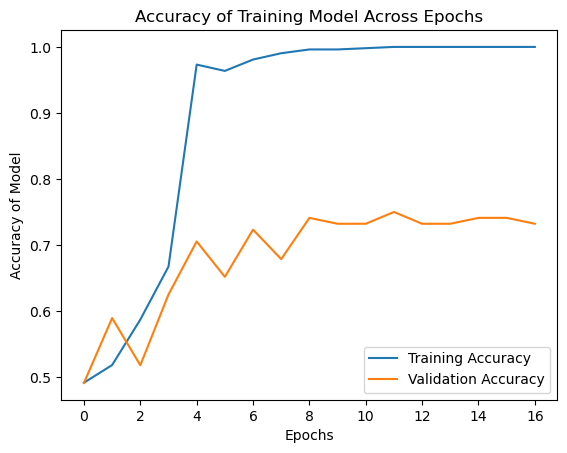

In [43]:
#Create visualization of accuracy from the model above
plt.plot(epoch_results.history['accuracy'], label= "Training Accuracy")
plt.plot(epoch_results.history['val_accuracy'], label= "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Model")
plt.legend()
plt.title("Accuracy of Training Model Across Epochs")
plt.show()

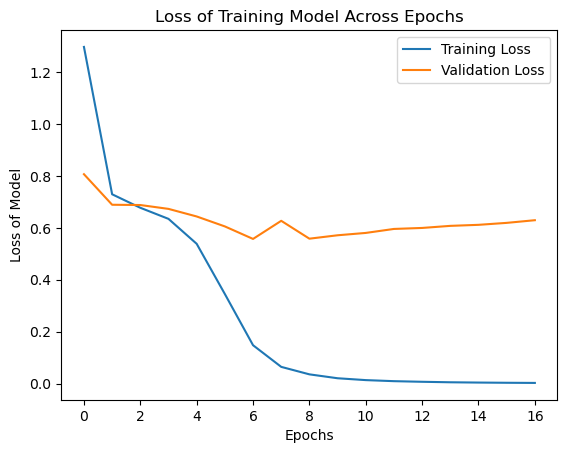

In [44]:
#Create a visualization to show loss for the trained model
plt.plot(epoch_results.history['loss'], label= "Training Loss")
plt.plot(epoch_results.history['val_loss'], label= "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss of Model")
plt.legend()
plt.title("Loss of Training Model Across Epochs")
plt.show()

From the graphs above it looks like there may be some overfitting in the model. In the accuracy graph the data is flattening out which is what we want to see. The model starts with a high training loss that is gradually decreasing into a flattened line which indicates that there is a good fit with the data. However when looking at the loss and validation loss graph we can see that there is overfitting there. The loss and validation loss of the model should remain relatively close to each other with the validation loss being slightly higher, but in the model that validation loss is significatly higher than the training loss which signifies overfitting.

### D4: Predictive Accuracy <a class="anchor" id="D4"></a>

To understand the trained predictive accuracy of the model we need to use the evaluate metric that was done above. We can see from that metric that the accuracy score is around 62% with a loss of .674. We can further understand this data using the model's predicted values and comparing them to the actual results that we are seeing. This can be done by first determining what the predicted values are and then by creating a confusion matrix to compare the actual values to the predicted values.

In [45]:
#Determine what the predictions are for the model
y_pred = model.predict(X_test_seq_trunc)

4/4 [==============================] - 0s 4ms/step


<Axes: >

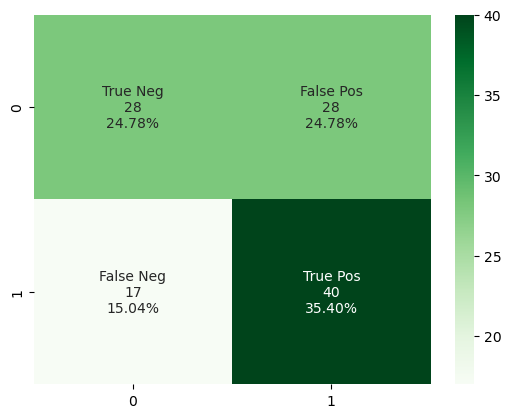

In [46]:
#Create confusion matrix to visualize the actual values compared to predicted values

from sklearn.metrics import confusion_matrix

#transform y_pred values into nearest integer
y_pred = np.rint(y_pred)

cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

The confusion matrix above verifies what we have already discussed above. There is overfitting in the model and the predicted values align with the actual values more often than they are wrong, but the model overall could definitely improve. Given the small amount of data that the model has to understand the reviews, I think that it is doing well. If we were to trian it with more data the model would only continue to improve. Based on the matrix above the model is correct about 62% of the time which is what we were expecting to see from calculations done above. Given that the evaluation metric was accuracy, it seems that the accuracy of our model can improve and this can be done by attaining more data to train the model.

## Part 5 - Summary and Recommendations <a class="anchor" id="Part5"></a>

#### Code to Save Trained Network within Neural Network

In [47]:
#Save the trained model within the neural network to easily recall later
model_file_name = "SentimentAnalysisModel.keras"
model.save(model_file_name)
print(f"Model successfully saved as {model_file_name}")

Model successfully saved as SentimentAnalysisModel.keras


#### Functionality of Neural Network

The nueral network that was created is doing an ok job at performing the sentiment analysis that we had wanted. The test data has an accuracy score of 62% which is not very high and a loss score of 67.4% which is significantly higher than I would like it to be. This means that the network has room to improve. This is a good start for the network as it provides mostly accurate results, but there are definitely things that could be improved to get an even more accurate model with a higher accuracy score and lower loss.

The architecture of the framework was effective. As I was going through the project I added and removed layers to try to optimize the model. I found that when I removed layers the model was less accurate and found that when I added extra dense layers to scale down the data to 0 or 1 it didn't make a big impact on the model results. The model architecture that I have above with one embedding layer, one flatted layer, and three dense layers was the architecture that produced the best results.

#### Recommended Course of Action

As I said above, I think this model is a good start but it can certainly improve. The amount of data that we have to train this model was extremely small (523 data points). This amount of data is not enough to train an accurate model. I would recommend that more movie reveiw data be acquired so that the model can get more training data which will help it to make more accurate predictions. The code that we have in place is scalable, so it would be simple to add the new data to the training set and improve the models accuracy and results. 

## Part 6 - Reporting <a class="anchor" id="Part6"></a>

#### Show Industry-Relevant Interactive Environment

The interactive environment for this project was Jupyter Notebook. A PDF copy of the notebook with all code outputs is attached.

#### Sources for Third-Party Code

Carremans, B. (2018). Using Word Embeddings for Sentiment Analysis. Retrieved from Kaggle: https://www.kaggle.com/code/bertcarremans/using-word-embeddings-for-sentiment-analysis/notebook

Hung, Q. K. (2021, April 18). Sentiment Analysis in Python-81% Accuracy. Retrieved from Medium: https://medium.com/@liangnguyen612/sentiment-analysis-in-python-81-accuracy-ab5d694b7ef8

#### Sources for In-Text Citations

Early Stopping on Validation Loss or Accuracy? (2024, Feb 16). Retrieved from Geeks for Geeks: https://www.geeksforgeeks.org/early-stopping-on-validation-loss-or-on-accuracy/

Vishwakarma, N. (2024, April 26). What is Adam Optimizer? Retrieved from Analytics Vidhya: https://www.analyticsvidhya.com/blog/2023/09/what-is-adam-optimizer/#:~:text=The%20Adam%20optimizer%2C%20short%20for,Stochastic%20Gradient%20Descent%20with%20momentum.

#### Professional Communication

Please see this document to determine professional communication for the project.